In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Ovan importas allt som behövs

Under så tar vi in all data som behövs

In [17]:
csv_dir = "C:/Users/Phili/Desktop/fond/data/SAND.csv"
data = pd.read_csv(csv_dir, header=0, index_col = 0, parse_dates = True, sep=";")

close = data["Closing price"]#[data.index > "2018-03-01"]
signals = pd.DataFrame(data=close.values,index = close.index, columns=["close"])
signals["signal"] = 0.0



Plotta det man vill plotta

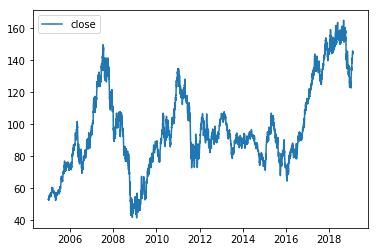

In [6]:
plt.plot(close, label="close")
plt.legend()

(3529, 3543)

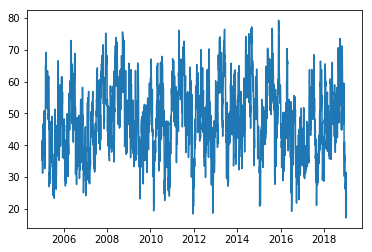

In [18]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(min_periods = 0, adjust=False, com=period-1, ignore_na = False).mean() / \
         d.ewm(min_periods = 0, adjust=False, com=period-1, ignore_na = False).mean()
    return 100 - 100 / (1 + rs)
rsi  = RSI(close, period =14)
plt.plot(rsi)
len(rsi),len(close)

Det är här själva trading logiken finns. Det skapas en lista med där man har:
    1 = long
    -1 = short
    0 = ingen
"positions" är då man går in eller ut ur en position. 

In [19]:
signals["signal"][:14] = np.where(rsi > 30, 1.0, 0.0)
signals["positions"] = signals["signal"].diff()


ValueError: cannot set using a slice indexer with a different length than the value

Här plottas signalerna, när man köpt osv.

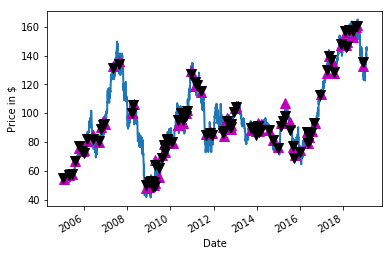

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
#signals[['short', 'middle', "long"]].plot(ax=ax1, lw=2.)
signals["close"].plot(ax=ax1, lw=2.)


# Plot the buy signals
ax1.plot(signals.loc[signals["positions"] == 1.0].index, 
         signals.close[signals["positions"] == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals["positions"] == -1.0].index, 
         signals.close[signals["positions"] == -1.0],
         'v', markersize=10, color='k')

Här räknas returns ut. 

In [3]:
port = pd.DataFrame(index=close.index)
port["rets"] = close.pct_change().dropna()

port["total_rets"] = port["rets"]*signals["signal"]
port["equity_curve"] = (1.0 + port["total_rets"]).cumprod()
port["volatility"] = port["total_rets"].rolling(252).std()
plt.subplot(1,3,1)
plt.plot(port["equity_curve"])
plt.subplot(1,3,2)
plt.plot(port["total_rets"])
plt.subplot(1,3,3)
plt.plot(port["volatility"])

NameError: name 'close' is not defined